#11.1 Date and Time Data Types and Tools

The Python standard library includes data types for date and time data, as well as calendar-related functionality

The **datetime.datetime** type, or simply datetime, is widely used:

In [1]:
from datetime import datetime

In [2]:
now = datetime.now()

In [3]:
now

datetime.datetime(2021, 10, 9, 8, 55, 38, 726102)

In [4]:
now.year, now.month, now.day

(2021, 10, 9)

datetime stores both the date and time down to the **microsecond**

**timedelta represents the temporal difference between two datetime objects:**

In [5]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

In [6]:
delta

datetime.timedelta(days=926, seconds=56700)

In [7]:
delta.days

926

In [8]:
delta.seconds

56700

You can **add** (or **subtract**) a timedelta or multiple thereof to a datetime object to yield a new shifted object:

In [9]:
from datetime import timedelta

In [10]:
start = datetime(2011, 1, 7)

In [11]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [12]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

Table 11-1 summarizes the data types in the datetime module



Table 11-1. Types in datetime module
<p align='center'>
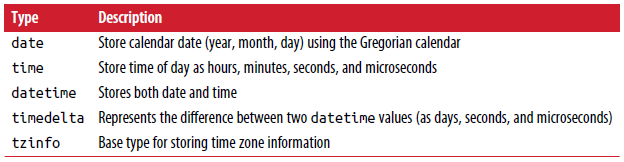
</p>

##Converting Between String and Datetime

You can format **datetime** objects and **pandas Timestamp** objects **as strings** using **str or the strftime** method, passing a format specification: 

In [13]:
stamp = datetime(2011, 1, 3)

In [14]:
str(stamp)

'2011-01-03 00:00:00'

In [15]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

See Table 11-2 for a complete list of the format codes

Table 11-2. Datetime format speciication (ISO C89 compatible)
<p align='center'>
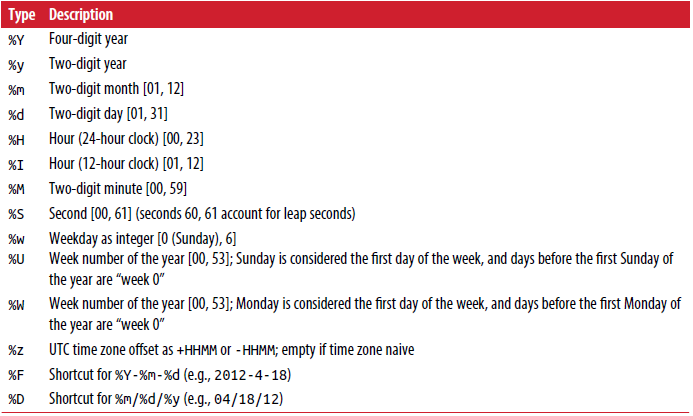
</p>

You can use these same format codes to convert **strings to dates** using date **time.strptime:**

In [16]:
value = '2011-01-03'

In [17]:
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [18]:
datestrs = ['7/6/2011', '8/6/2011']

In [19]:
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

datetime.strptime is a good way to parse a date with a known format

However, it can be a bit annoying to have to write a format spec each time, especially for **common date formats**

In this case, you can use the **parser.parse** method in the third-party **dateutil** package (this is installed automatically when you install pandas):

In [20]:
from dateutil.parser import parse

In [21]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

dateutil is capable of parsing most human-intelligible date representations

In [22]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

strptimeIn international locales, **day appearing before month** is very common, so you can pass **dayfirst=True** to indicate this:

In [23]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

pandas is generally oriented toward working with arrays of dates, whether used as an axis index or a column in a DataFrame

The **to_datetime** method **parses many different kinds of date representations.** Standard date formats like **ISO 8601** can be parsed very quickly:

In [24]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

In [25]:
import pandas as pd

In [26]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

It also handles values that should be considered missing (None, empty string, etc.):

In [27]:
idx = pd.to_datetime(datestrs + [None])

In [28]:
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [29]:
idx[2]

NaT

In [30]:
pd.isnull(idx)

array([False, False,  True])

NaT (Not a Time) is pandas’s null value for timestamp data

**datetime objects also have a number of locale-specific formatting options for systems in other countries or languages**

For example, the abbreviated month names will be different on German or French systems compared with English systems

See Table 11-3 for a listing

Table 11-3. Locale-speciic date formatting
<p align='center'>
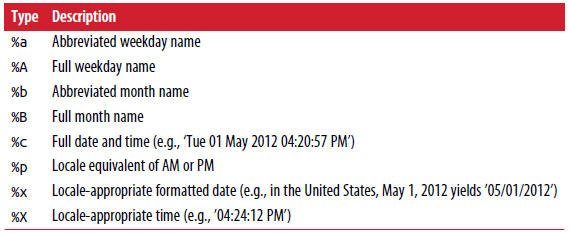
</p>

# 11.2 Time Series Basics

A basic kind of time series object in pandas is a Series **indexed by timestamps,** which is often represented external to pandas as Python strings or datetime objects:

In [31]:
from datetime import datetime
import numpy as np

In [32]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [33]:
ts = pd.Series(np.random.randn(6), index=dates)

In [34]:
ts

2011-01-02   -1.627243
2011-01-05    1.693687
2011-01-07   -1.824543
2011-01-08    0.985884
2011-01-10    0.719644
2011-01-12    1.496330
dtype: float64

Under the hood, **these datetime objects have been put in a DatetimeIndex:**

In [35]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

Like other Series, arithmetic operations between differently indexed time series automatically **align on the dates:**

In [36]:
ts + ts[::2]

2011-01-02   -3.254485
2011-01-05         NaN
2011-01-07   -3.649087
2011-01-08         NaN
2011-01-10    1.439287
2011-01-12         NaN
dtype: float64

Recall that ts[::2] selects every second element in ts

**pandas stores timestamps using NumPy’s datetime64 data type** at the nanosecond resolution:

In [37]:
ts.index.dtype

dtype('<M8[ns]')

Scalar values from a DatetimeIndex are **pandas Timestamp** objects:

In [38]:
stamp = ts.index[0]

In [39]:
stamp

Timestamp('2011-01-02 00:00:00')

**A Timestamp can be substituted anywhere you would use a datetime object**

## Indexing, Selection, Subsetting

Time series behaves like any other pandas.Series when you are indexing and selecting data based on label:

In [40]:
stamp = ts.index[2]

In [41]:
ts[stamp]

-1.8245432665551737

As a convenience, **you can also pass a string that is interpretable as a date:**

In [42]:
ts['1/10/2011']

0.7196437343655472

In [43]:
ts['20110110']

0.7196437343655472

For longer time series, **a year or only a year and month can be passed to easily select slices of data:**

In [44]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))

In [45]:
longer_ts

2000-01-01    0.293130
2000-01-02    1.870352
2000-01-03   -0.016032
2000-01-04    0.489818
2000-01-05    0.363839
                ...   
2002-09-22   -0.016293
2002-09-23    0.012525
2002-09-24   -1.758766
2002-09-25   -0.423042
2002-09-26    0.813951
Freq: D, Length: 1000, dtype: float64

In [46]:
longer_ts['2001']

2001-01-01    0.023349
2001-01-02    0.282867
2001-01-03   -0.253294
2001-01-04   -0.029683
2001-01-05    1.111213
                ...   
2001-12-27   -0.010196
2001-12-28    0.681151
2001-12-29    1.069765
2001-12-30    0.455705
2001-12-31   -0.253521
Freq: D, Length: 365, dtype: float64

Here, the string '2001' is interpreted as a year and selects that time period

**This also works if you specify the month:**

In [47]:
longer_ts['2001-05'][:5]

2001-05-01   -0.748441
2001-05-02    0.346626
2001-05-03   -1.280260
2001-05-04   -0.786601
2001-05-05    2.606395
Freq: D, dtype: float64

**Slicing with datetime objects works as well:**

In [48]:
ts[datetime(2011, 1, 7):]

2011-01-07   -1.824543
2011-01-08    0.985884
2011-01-10    0.719644
2011-01-12    1.496330
dtype: float64

Because most time series data is ordered chronologically, **you can slice with time stamps not contained in a time series to perform a range query:**

In [49]:
ts

2011-01-02   -1.627243
2011-01-05    1.693687
2011-01-07   -1.824543
2011-01-08    0.985884
2011-01-10    0.719644
2011-01-12    1.496330
dtype: float64

In [50]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -1.824543
2011-01-08    0.985884
2011-01-10    0.719644
dtype: float64

You can pass either a string date, datetime, or timestamp

Remember that **slicing in this manner produces views on the source time series** like slicing NumPy arrays

This means that no data is copied and **modifications on the slice will be reflected in the original data**

There is an equivalent instance method, **truncate**, that **slices a Series between two dates:**

In [51]:
ts.truncate(after='1/9/2011')

2011-01-02   -1.627243
2011-01-05    1.693687
2011-01-07   -1.824543
2011-01-08    0.985884
dtype: float64

All of this holds true for DataFrame as well, indexing on its rows:

In [52]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')

In [53]:
long_df = pd.DataFrame(np.random.randn(100, 4),
          index=dates,
          columns=['Colorado', 'Texas',
          'New York', 'Ohio'])

In [54]:
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-0.630789,-1.185495,-0.971282,-0.856489
2001-05-09,-0.395333,-1.015495,-0.286757,1.413851
2001-05-16,-1.982624,0.387804,2.218804,0.097286
2001-05-23,0.068267,-0.283791,0.414353,-1.363111
2001-05-30,0.624873,0.384564,1.327577,1.065558


## Time Series with Duplicate Indices

In some applications, **there may be multiple data observations falling on a particular timestamp.** Here is an example:

In [55]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])

In [56]:
dup_ts = pd.Series(np.arange(5), index=dates)

In [57]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

We can tell that the index is not unique by checking its is_unique property:

In [58]:
dup_ts.index.is_unique

False

Indexing into this time series will now **either produce scalar values** or **slices depending on whether a timestamp is duplicated:**

In [59]:
dup_ts['1/3/2000'] # not duplicated

4

In [60]:
dup_ts['1/2/2000'] # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

Suppose you wanted to **aggregate the data having non-unique timestamps**
 
One way to do this is to use **groupby and pass level= 0:**

In [61]:
grouped = dup_ts.groupby(level=0)

In [62]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [63]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

# 11.3 Date Ranges, Frequencies, and Shifting

**Generic time series** in pandas are assumed to be **irregular;** that is, they have **no fixed frequency**

It’s often desirable to work relative to a fixed frequency, such as daily, monthly, or every 15 minutes, even if that means introducing missing values into a time series

Fortunately pandas has a full suite of standard time series frequencies and tools for **resampling, inferring frequencies, and generating fixed-frequency date ranges**

For example, **you can convert the sample time series to be fixed daily frequency by calling resample:**

In [64]:
ts

2011-01-02   -1.627243
2011-01-05    1.693687
2011-01-07   -1.824543
2011-01-08    0.985884
2011-01-10    0.719644
2011-01-12    1.496330
dtype: float64

In [65]:
resampler = ts.resample('D')

The string 'D' is interpreted as daily frequency



## Generating Date Ranges

**pandas.date_range** is responsible for **generating a DatetimeIndex with an indicated length according to a particular frequency:**



In [66]:
index = pd.date_range('2012-04-01', '2012-06-01')

In [67]:
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

**By default, date_range generates daily timestamps**

If you pass only a **start or end date,** you must pass a number of **periods** to generate:

In [68]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [69]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

The start and end dates define strict boundaries for the generated date index

For example, if you wanted a date index containing the last **business day** of each month, you would pass the **'BM' frequency** and only dates falling on or inside the date interval will be included:



In [70]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

Table 11-4. Base time series frequencies (not comprehensive)
<p align='center'>
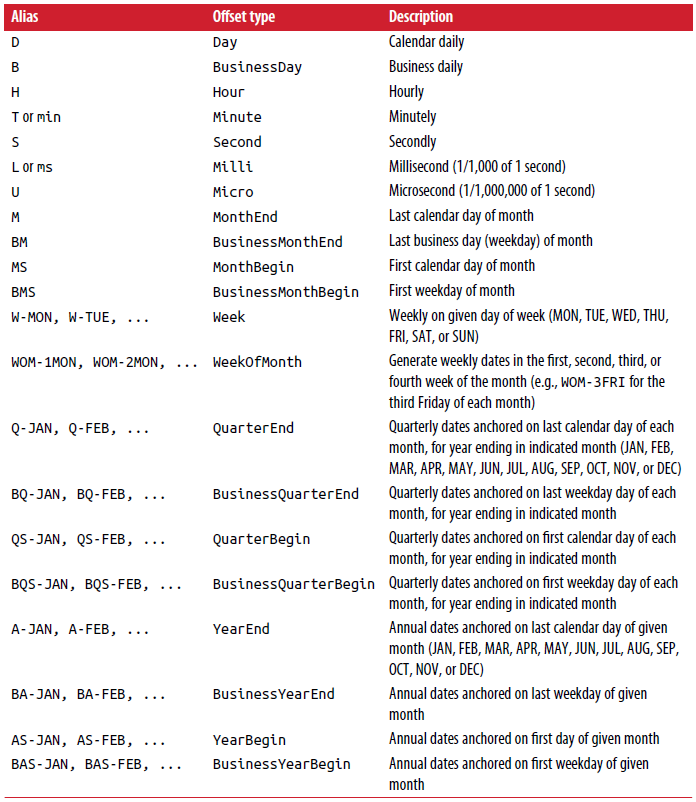
</p>

date_range by default **preserves the time (if any) of the start or end timestamp:**

In [71]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

Sometimes you will have start or end dates with time information but want to generate a set of timestamps **normalized to midnight as a convention**

To do this, there is a normalize option:

In [72]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

## Frequencies and Date Offsets

**Frequencies** in pandas are composed of a **base frequency and a multiplier**

**Base frequencies** are typically referred to by a **string alias,** like **'M' for monthly or 'H' for hourly**

For each base frequency, there is an object defined generally referred to as a **date offset**

For example, hourly frequency can be represented with the Hour class:

In [73]:
from pandas.tseries.offsets import Hour, Minute

In [74]:
hour = Hour()

In [75]:
hour

<Hour>

You can define a multiple of an offset by passing an integer:

In [76]:
four_hours = Hour(4)

In [77]:
four_hours

<4 * Hours>

In most applications, you would never need to explicitly create one of these objects, **instead using a string alias like 'H' or ' 4H'**

Putting an **integer before the base frequency** creates a multiple:

In [90]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

Many offsets can be combined together by addition:

In [79]:
Hour(2) + Minute(30)

<150 * Minutes>

Similarly, you can pass frequency strings, like **'1h30min',** that will effectively be parsed to the same expression:

In [92]:
pd.date_range('2001-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2001-01-01 00:00:00', '2001-01-01 01:30:00',
               '2001-01-01 03:00:00', '2001-01-01 04:30:00',
               '2001-01-01 06:00:00', '2001-01-01 07:30:00',
               '2001-01-01 09:00:00', '2001-01-01 10:30:00',
               '2001-01-01 12:00:00', '2001-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

**Some frequencies describe points in time that are not evenly spaced**

For example, **'M'** (calendar month end) and **'BM'** (last business/weekday of month) depend on the number of days in a month and, **in the latter case, whether the month ends on a weekend or not.** We refer to these as **anchored offsets**

### Week of month dates

One useful frequency class is **“week of month,”** starting with **WOM.** **This enables you to get dates like the third Friday of each month:**

In [93]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')

In [98]:
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

## Shifting (Leading and Lagging) Data

**“Shifting” refers to moving data backward and forward through time**

Both Series and DataFrame have a **shift method** for doing **naive shifts forward or backward, leaving the index unmodified:**

In [111]:
ts = pd.Series([1, 2, 3, 4],
               index=pd.date_range('1/1/2000', periods=4, freq='M'))

In [112]:
ts

2000-01-31    1
2000-02-29    2
2000-03-31    3
2000-04-30    4
Freq: M, dtype: int64

In [113]:
ts.shift(2)

2000-01-31    NaN
2000-02-29    NaN
2000-03-31    1.0
2000-04-30    2.0
Freq: M, dtype: float64

In [114]:
ts.shift(-2)

2000-01-31    3.0
2000-02-29    4.0
2000-03-31    NaN
2000-04-30    NaN
Freq: M, dtype: float64

When we shift like this, **missing data is introduced either at the start or the end of the time series**

A **common use** of shift is **computing percent changes in a time series or multiple time series** as DataFrame columns. This is expressed as:

In [115]:
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29    1.000000
2000-03-31    0.500000
2000-04-30    0.333333
Freq: M, dtype: float64

Because naive shifts **leave the index unmodified, some data is discarded**

Thus if the frequency is known, it can be passed to shift to advance the timestamps instead of simply the data:



In [117]:
ts.shift(2, freq='M')

2000-03-31    1
2000-04-30    2
2000-05-31    3
2000-06-30    4
Freq: M, dtype: int64

Other frequencies can be passed, too, giving you some flexibility in how to lead and lag the data:

In [118]:
ts.shift(3, freq='D')

2000-02-03    1
2000-03-03    2
2000-04-03    3
2000-05-03    4
dtype: int64

In [122]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00    1
2000-02-29 01:30:00    2
2000-03-31 01:30:00    3
2000-04-30 01:30:00    4
dtype: int64

The T here stands for minutes

## Shifting dates with ofsets

The pandas **date offsets** can also be used with **datetime** or **Timestamp** objects:

In [127]:
from pandas.tseries.offsets import Day, MonthEnd

In [125]:
now = datetime(2011, 11, 17)

In [129]:
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')